Importing libraries

In [12]:
import gzip
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

Creating a directed graph


In [4]:
G = nx.DiGraph()

Reading the data for Email communication links between members of the institution

In [5]:
with gzip.open('email-Eu-core.txt.gz', 'rt') as f:
    for line in f:
        sender, recipient = line.strip().split()
        sender = int(sender)
        recipient = int(recipient)
        G.add_edge(sender, recipient)

Reading data for Department membership labels

In [6]:
department_dict = {}

with gzip.open('email-Eu-core-department-labels.txt.gz', 'rt') as f:
    for line in f:
        node_str, dept_str = line.strip().split()
        node_id = int(node_str)
        dept_id = int(dept_str)
        department_dict[node_id] = dept_id


Attaching department labels to the graph


In [7]:
nx.set_node_attributes(G, department_dict, "department")

Degree distribution


In [8]:
in_degrees = [G.in_degree(n) for n in G.nodes()]
out_degrees = [G.out_degree(n) for n in G.nodes()]

Plotting histogram using matplotlib

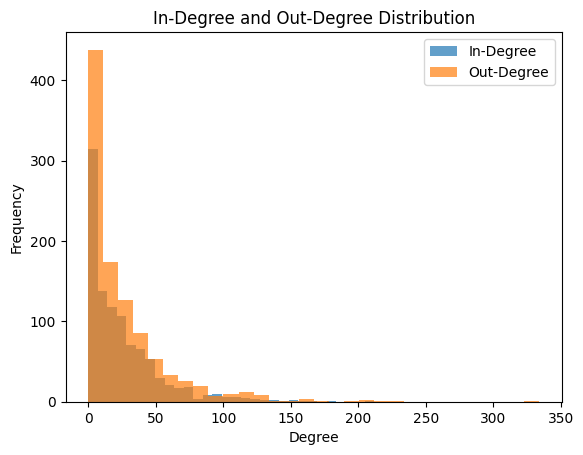

Average in-degree: 25.443781094527363
Average out-degree: 25.443781094527363
Max in-degree: 212
Max out-degree: 334


In [18]:
plt.hist(in_degrees, bins=30, alpha=0.7, label='In-Degree')
plt.hist(out_degrees, bins=30, alpha=0.7, label='Out-Degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
plt.title('In-Degree and Out-Degree Distribution')
plt.show()

#Numerical summaries
print("Average in-degree:", np.mean(in_degrees))
print("Average out-degree:", np.mean(out_degrees))
print("Max in-degree:", np.max(in_degrees))
print("Max out-degree:", np.max(out_degrees))

Clustering coefficient (undirected approximation)


In [16]:
G_undirected = G.to_undirected()
avg_clust = nx.average_clustering(G_undirected)
print("Average clustering (undirected):", avg_clust)

Average clustering (undirected): 0.3993549664221543


centrality measures


In [21]:
# Degree Centrality
deg_cent = nx.degree_centrality(G)  # dictionary {node: centrality}

# Betweenness Centrality
bet_cent = nx.betweenness_centrality(G, normalized=True)

# Closeness Centrality
close_cent = nx.closeness_centrality(G)

print(deg_cent)
print(bet_cent)
print(close_cent)

{0: 0.07270916334661355, 1: 0.05179282868525896, 2: 0.1603585657370518, 3: 0.11752988047808764, 4: 0.16235059760956175, 5: 0.2788844621513944, 6: 0.20119521912350596, 7: 0.11553784860557768, 8: 0.061752988047808766, 9: 0.05976095617529881, 10: 0.07470119521912351, 11: 0.13346613545816732, 12: 0.09561752988047809, 13: 0.23207171314741035, 14: 0.12749003984063745, 15: 0.08167330677290836, 16: 0.1145418326693227, 17: 0.16633466135458166, 18: 0.08764940239043825, 19: 0.11952191235059761, 20: 0.11752988047808764, 21: 0.23904382470119523, 22: 0.026892430278884463, 23: 0.13147410358565736, 24: 0.06274900398406374, 25: 0.049800796812749, 26: 0.052788844621513946, 27: 0.09561752988047809, 28: 0.17330677290836652, 29: 0.09362549800796813, 30: 0.11155378486055777, 31: 0.08167330677290836, 32: 0.054780876494023904, 33: 0.04282868525896414, 34: 0.04880478087649402, 35: 0.09661354581673307, 36: 0.06274900398406374, 37: 0.053784860557768925, 38: 0.0697211155378486, 39: 0.04880478087649402, 40: 0.1005

Exporting to Gephi

In [20]:
nx.write_gexf(G, "email_eu_core_with_depts.gexf")